<a href="https://colab.research.google.com/github/Charulatha0/Deep-Learning/blob/main/Character_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.S7W4KO_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.S7W4KO_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.
Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 59s 82ms/step - accuracy: 0.6764 - loss: 1.1081 - val_accuracy: 0.8754 - val_loss: 0.3925
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.9001 - loss: 0.3107 - val_accuracy: 0.8953 - val_loss: 0.3249
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.9187 - loss: 0.2458 - val_accuracy: 0.9106 - val_loss: 0.2742
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9303 - loss: 0.2064 - val_accuracy: 0.9137 - val_loss: 0.2640
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.9377 - loss: 0.1801 - val_accuracy: 0.9176 - val_loss: 0.2513
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.9431 - loss: 0.1612 - val_accuracy: 0.9147 - val_loss: 0.2497
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.9508 - loss: 0.1425 - v

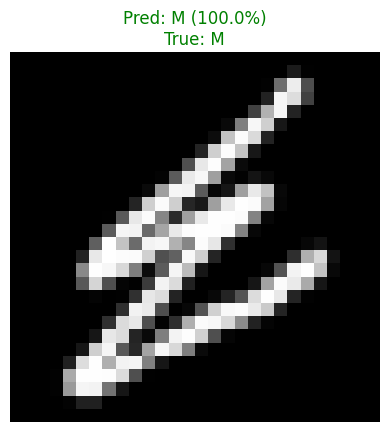

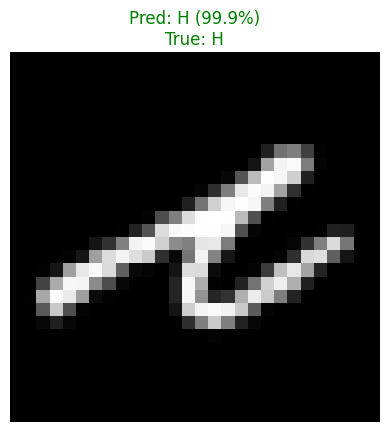

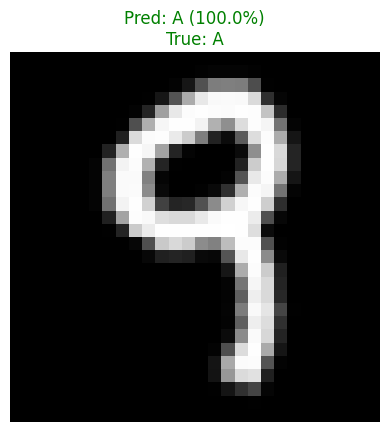

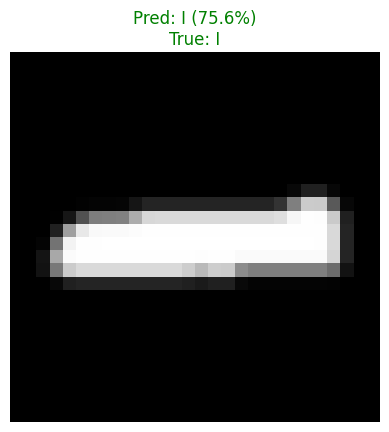

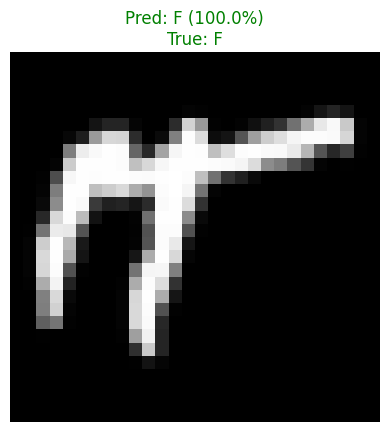

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

# Load EMNIST Letters dataset using TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Function to normalize images and adjust labels (EMNIST labels are 1-26 for letters A-Z, shift to 0-25)
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = label - 1  # shift labels from 1-26 to 0-25
    return image, label

# Prepare training dataset
batch_size = 128
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Prepare testing dataset
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 classes (letters A-Z)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10
history = model.fit(ds_train, epochs=epochs, validation_data=ds_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test accuracy: {test_acc:.4f}')

# Visualize some predictions
class_names = [chr(i) for i in range(65, 91)]  # A-Z

def plot_prediction(image, label, pred_probs):
    plt.imshow(tf.squeeze(image), cmap='gray')
    pred_label = np.argmax(pred_probs)
    true_label = label.numpy()
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {class_names[pred_label]} ({100*np.max(pred_probs):.1f}%)\nTrue: {class_names[true_label]}", color=color)
    plt.axis('off')
    plt.show()

# Take one batch from test set and plot some predictions
for images, labels in ds_test.take(1):
    preds = model.predict(images)
    for i in range(5):
        plot_prediction(images[i], labels[i], preds[i])